**Problem 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = []
b = []
for n in range(0, 52, 2):
    if n % 3 == 0:
        a.append(0)
    else:
        a.append((n ** 2) - 1)
    b.append(n)
        
s1 = pd.Series(a, index=b)
s1

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64

**Problem 2**

In [3]:
pd.date_range("1 January 2000", "31 December 2000")

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-22', '2000-12-23', '2000-12-24', '2000-12-25',
               '2000-12-26', '2000-12-27', '2000-12-28', '2000-12-29',
               '2000-12-30', '2000-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [4]:
def time_series(p, d=100):
    index = pd.date_range("1 January 2000", "31 December 2000")
    series = pd.Series(data=np.random.binomial(1, p, size=len(index)), 
                       index=index)
    series[0] = d
    series = series.cumsum() #important
    series[series < 0] = 0
    return series

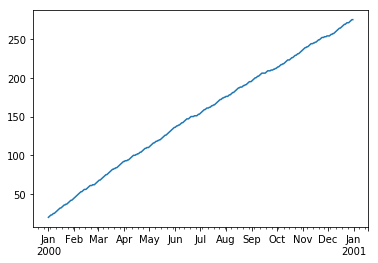

In [5]:
time_series(0.7, d=20).plot()
plt.show()

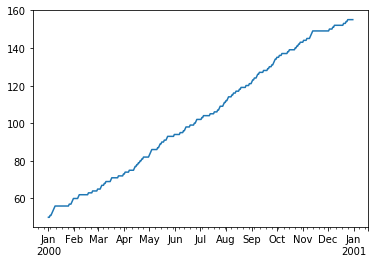

In [6]:
time_series(0.3, d=50).plot()
plt.show()

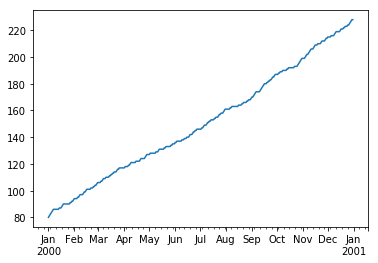

In [7]:
time_series(0.4, d=80).plot()
plt.show()

**Problem 3**

In [8]:
df = pd.DataFrame(np.random.randn(4,2), index=['a', 'b', 'c', 'd'], columns = ['I', 'II'])

In [9]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 
'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age,
'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major
})


In [10]:
studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex'] == 'M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


**Problem 4**

In [11]:
pd.merge(studentInfo[studentInfo['Sex'] == 'M'], otherInfo, on='ID')[['ID', 'Age', 'GPA']]

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


**Problem 5**

Insert a new column into the data frame that contains the crime rate by year (the ratio of "Total" column to the "Population" column).

Plot the crime rate as a function of the year.

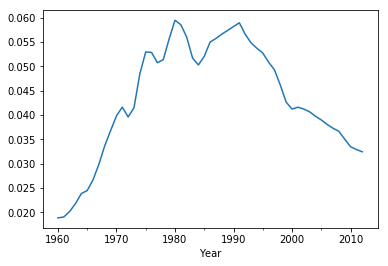

In [12]:
crime = pd.read_csv('crime_data.txt', skiprows=1, index_col=0)
crime.index = pd.to_datetime(crime.index, format='%Y')
crime['Crime Rate Per Year'] = crime['Total'] / crime['Population']
crime['Crime Rate Per Year'].plot()
plt.show()

List the 5 years with the highest crime rate in descending order.

In [13]:
crime['Crime Rate Per Year'].sort_values(ascending=False)[:5]

Year
1980-01-01    0.059500
1991-01-01    0.058978
1981-01-01    0.058582
1990-01-01    0.058203
1989-01-01    0.057410
Name: Crime Rate Per Year, dtype: float64

Calculate the average number of total crimes as well as burglary crimes 
between 1960 and 2012

In [14]:
avg = crime['Total'].mean()
burg_avg = crime['1960':'2012'].Burglary.mean()

print(avg)
print(burg_avg)

10638068.075471697
2446286.2075471696


Find the years for which the total number of crimes was below average, 
but the number of burglaries was above average.

In [15]:
years = crime.index[(crime['Total'] < avg) & 
                    (crime['Burglary'] > burg_avg)].tolist()
print(str(years))

[Timestamp('1973-01-01 00:00:00'), Timestamp('1974-01-01 00:00:00')]


Plot the number of murders as a function of the population

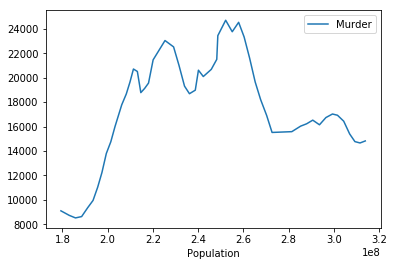

In [16]:
crime.plot(x='Population', y='Murder') # do scatter?

In [17]:
sub_crimes = crime[(crime.index >= str(1980)) & (crime.index <= str(1989))][["Population", "Violent", "Robbery"]] 
sub_crimes.to_csv("crime_subset.csv")

**Problem 6**

In [18]:
titanic = pd.read_csv('titanic.csv')
titanic # Checking data

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [19]:
titanic = titanic.drop(["Sibsp", "Parch", "Cabin", "Boat", "Body", 
                        "home.dest"], axis=1)
titanic # Checking data

,Pclass,Survived,Name,Sex,Age,Ticket,Fare,Embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,S
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,19952,26.5500,S
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,13502,77.9583,S
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,112050,0.0000,S
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,11769,51.4792,S
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,PC 17609,49.5042,C


In [20]:
titanic.dropna(subset=["Survived"], inplace=True)
titanic.Survived.replace({1: True, 0: False}, inplace=True)
titanic.Age.fillna(titanic.Age.mean())
titanic.to_csv('titanic_clean.csv')

How many people survived? What percentage of passengers survived?

In [21]:
totalSurvive = titanic.Survived.sum()
percSurvive = (titanic.Survived.sum() / len(titanic)) * 100

print(totalSurvive)
print(percSurvive)

500
38.19709702062643


What was the average price of a ticket? How much did the most expensive ticket
cost?

In [22]:
avgTktPrice = titanic.Fare.mean()
expsvTkt = titanic.Fare.max()

print(avgTktPrice)
print(expsvTkt)

33.29547928134572
512.3292


How old was the oldest survivor? How young was the youngest survivor?
What about the non-survivors?

In [23]:
oldestSurvive = titanic[titanic.Survived].Age.max()
youngestSurvive = titanic[titanic.Survived].Age.min()
oldestNotSurvive = titanic[titanic.Survived == False].Age.max()
youngestNotSurvive = titanic[titanic.Survived == False].Age.min()

print(oldestSurvive)
print(youngestSurvive)
print(oldestNotSurvive)
print(youngestNotSurvive)

80.0
0.1667
74.0
0.3333
